<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Описание-данных" data-toc-modified-id="Описание-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Описание данных</a></span></li><li><span><a href="#Загрузка-данных" data-toc-modified-id="Загрузка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Загрузка данных</a></span></li><li><span><a href="#Умножение-матриц" data-toc-modified-id="Умножение-матриц-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Умножение матриц</a></span></li><li><span><a href="#Алгоритм-преобразования" data-toc-modified-id="Алгоритм-преобразования-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Алгоритм преобразования</a></span></li><li><span><a href="#Проверка-алгоритма" data-toc-modified-id="Проверка-алгоритма-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Проверка алгоритма</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Вывод</a></span></li></ul></div>

# Защита персональных данных клиентов

Вам нужно защитить данные клиентов страховой компании «Хоть потоп». Разработайте такой метод преобразования данных, чтобы по ним было сложно восстановить персональную информацию. Обоснуйте корректность его работы.

Нужно защитить данные, чтобы при преобразовании качество моделей машинного обучения не ухудшилось. Подбирать наилучшую модель не требуется.

## Описание данных

**Признаки:** пол, возраст и зарплата застрахованного, количество членов его семьи.

**Целевой признак:** количество страховых выплат клиенту за последние 5 лет.

## Загрузка данных

Импортируем необходимые библиотеки

In [1]:
import os 
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression

Загрузим датафрейм

In [2]:
pth = '/datasets/insurance.csv'

if os.path.exists(pth):
    data = pd.read_csv(pth)
else:
    print('Something is wrong')

Выведем первые 5 строчек датафрейма и посмотрим общую информацию о нем

In [3]:
data.head()

,Пол,Возраст,Зарплата,Члены семьи,Страховые выплаты
0,1,41.0,49600.0,1,0
1,0,46.0,38000.0,1,1
2,0,29.0,21000.0,0,0
3,0,21.0,41700.0,2,0
4,1,28.0,26100.0,0,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Пол                5000 non-null   int64  
 1   Возраст            5000 non-null   float64
 2   Зарплата           5000 non-null   float64
 3   Члены семьи        5000 non-null   int64  
 4   Страховые выплаты  5000 non-null   int64  
dtypes: float64(2), int64(3)
memory usage: 195.4 KB


Переменяем названия столбцов в соответствии со змеином стилем для удобства работы со столбцами  

In [5]:
data = data.rename(columns={
    'Пол':'gender',
    'Возраст':'age',
    'Зарплата':'salary',
    'Члены семьи':'family_member',
    'Страховые выплаты': 'insurance_payments'
})

Заменим тип данных для колонки “age” и ”salary”

In [6]:
data['age'] = data['age'].astype('int')
data['salary'] = data['salary'].astype('int')

Посмотрим на количество пропусков в датафрейме

In [7]:
data.isna().sum()

gender                0
age                   0
salary                0
family_member         0
insurance_payments    0
dtype: int64

Пропуски отсутствуют 

Найдем явные дубликаты в датафрейме 

In [8]:
data.duplicated().sum()

153

Обнаружены 153 дубликата, но из-за того что датафрейм не содержит такую персональную информацию как ФИО, утверждать что это одни и те же люди невозможно, поэтому не будем их убирать

Проверим датафрейм на выбросы

In [9]:
data['gender'].unique()

array([1, 0])

Выбросов не обнаружено 

In [10]:
data['insurance_payments'].unique()

array([0, 1, 2, 3, 5, 4])

Выбросов не обнаружено

In [11]:
data['family_member'].unique()

array([1, 0, 2, 4, 3, 5, 6])

Выбросов не обнаружено 

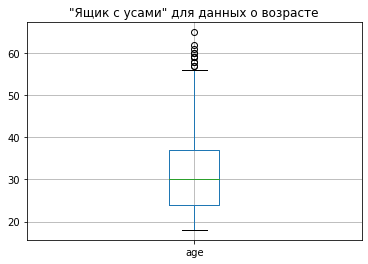

In [12]:
data.boxplot(column='age')
plt.title('"Ящик с усами" для данных о возрасте');

Ящик с усами показывает некое количество выбросов, но они в находятся в пределах нормы, убирать эти значения мы не будем 

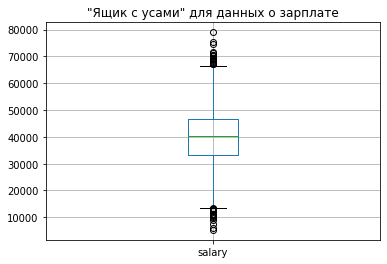

In [13]:
data.boxplot(column='salary')
plt.title('"Ящик с усами" для данных о зарплате');

Ящик с усами показывает некое количество выбросов, но они в находятся в пределах нормы, убирать эти значения мы не будем 

**Вывод:** В данном разделе были изменены названия колонок датафрейма, тип данных колонок “age” и ”salary”. Пропуски, явные дубликаты и выбросы обнаружены не были

## Умножение матриц

В этом задании вы можете записывать формулы в *Jupyter Notebook.*

Чтобы записать формулу внутри текста, окружите её символами доллара \\$; если снаружи —  двойными символами \\$\\$. Эти формулы записываются на языке вёрстки *LaTeX.* 

Для примера мы записали формулы линейной регрессии. Можете их скопировать и отредактировать, чтобы решить задачу.

Работать в *LaTeX* необязательно.

Обозначения:

- $X$ — матрица признаков (нулевой столбец состоит из единиц)

- $y$ — вектор целевого признака

- $P$ — матрица, на которую умножаются признаки

- $w$ — вектор весов линейной регрессии (нулевой элемент равен сдвигу)

- $E$ — единичная матрица

Предсказания:

$$
a = Xw
$$

Задача обучения:

$$
w = \arg\min_w MSE(Xw, y)
$$

Формула обучения:

$$
w = (X^T X)^{-1} X^T y
$$

**Ответ:** Не изменится

**Обоснование:** Представим умножение признаков на обратимую матрицу как: 

$$
M = XP
$$

Подставим матрицу в формулу обучения и раскроем ее:

$$
w_p = (M^T M)^{-1} M^T y
$$

$$
w_p = ((XP)^T (XP))^{-1} (XP)^T y
$$

(1) Из свойтва транспонирования мы знаем что:

$$
(AB)^T = B^T A^T
$$

И раскроем скобки для нашей формулы:

$$
w_p = (P^T X^T XP)^{-1} P^T X^T y = (P^T (X^T X) P)^{-1} P^T X^T y 
$$

(2) Из свойства обратной матрицы мы знаем что:

$$
(AB)^{-1} = B^{-1} A^{-1}
$$

И еще раз раскроем скобки для нашей формулы:

$$
w_p = P^{-1} (X^T X)^{-1} (P^T)^{-1} P^T X^T y 
$$

(3) Для дальнейшего преобразования на пригодятся свойство:

$$
A A^{-1} = A^{-1} A = E
$$

(4) И свойство: 

$$
A E = E A = A
$$

Из свойства (3) получается что:
$$
(P^T)^{-1} P^T = E
$$

Применим полученый результат и сгруппируем X:

$$
w_p = P^{-1} (X^T X)^{-1} E X^T y = P^{-1} (X^T X)^{-1} X^T y
$$

Применим свойство (4) и представим левую часть уравнения как формулу обучения:

$$
w_p = P^{-1} w
$$

Формула для предсказания в нашем случае выглядит так:

$$
a = M w_p
$$

Подставим раннее полученные значения и преобразуем формулу из свойства (3) и (4):

$$
a = X P P^{-1} w
$$

$$
a = X E w
$$

$$
a = X w
$$

**Получилась изначальная формула для обучения**

## Алгоритм преобразования

**Алгоритм**

Выборка на признаками умножаются на обратимую матрицу размером 4 х 4

**Обоснование**

1) Доказательство из пункта "Умножение матриц": Умножение матрицы на обратимую матрицу не повлияет на качество модели

2) Правило умножения матриц: Для того чтобы не добавить лишние столбцы, было принято взять матрицу размером "количество столбцов выборке с персональными данными х количество столбцов выборке с персональными данными" (4x4)

3) Поскольку данные умножаются на случайно сгенерированную матрицу, умножать весь датафрейм нельзя, так как целевые значения будут менятся при каждом запуске алгоритма 

## Проверка алгоритма

Разделим датафрейм на выборку с признаками и на выборку с целевым признаком

In [14]:
features = data.drop('insurance_payments', axis=1)
target = data['insurance_payments']

Обучим модель линейной регрессии и найдем значение R2 - метрики

In [15]:
model = LinearRegression()
model.fit(features, target)
predict = model.predict(features)
r2_first = r2_score(target, predict)
r2_first

0.42494550308169177

Применим предложенный алгоритм преобразования на выборке с признаками и убедимся что размер выборки не изменился

In [16]:
random_array = np.random.normal(size=(4,4))

try:
    np.linalg.inv(random_array)
except:
    print('Упс, сгенерировалась необратимая матрица')
    
features_new = np.array(features) @ random_array
features_new.shape

(5000, 4)

Обучим модель линейной регрессии на измененной выборке и найдем значение R2 - метрики

In [17]:
model.fit(features_new, target)
predict = model.predict(features_new)
r2_second = r2_score(target, predict)
r2_second

0.42494550308169055

Найдем разницу полученных R2 - метрик

In [18]:
variance = r2_first - r2_second
variance

1.2212453270876722e-15

Отличие в полученных значениях R2-метрик начинается только после 15 знака, поэтому это отличие можно считать несущественным

**Вывод:** Обучив 2 модели линейной регрессии с алгоритмом преобразования и без алгоритма преобразования мы получаем различие R2 - метрик только после 15 знака, поэтому можно утверждать, что применение алгоритма преобразования данных не влияет на качество обучаемой модели. 

## Вывод

В разделе "Загрузка данных" был загружен и изучен датафрейм. Были изменены названия колонок датафрейма, тип данных колонок “age” и ”salary”. Пропуски, явные дубликаты и выбросы обнаружены не были.

В разделе "Умножение матриц" математически был получен ответ на главный вопрос исследования: Умножение данных на обратимую матрицу не влияет на качество обучаемой модели.

В разделе "Алгоритм преобразования" был предложен алгоритм преобразования данных: Выборка с признаками клиентов умножаются на матрицу 4х4. Размер матрицы подобран для того, чтобы не менять количество столбцов и строчек. Алгоритм не применяется к выборке с таргетными признаками из-за того, что таргетные признаки будут меняться при каждом запуске алгоритма.

В разделе "Проверка алгоритма" эмпирическим путем было доказано утверждение из раздела "Умножение матриц". Обучив 2 модели линейной регрессии с алгоритмом преобразования и без алгоритма преобразования мы получаем различие R2 - метрик только после 15 знака, поэтому можно утверждать, что применение алгоритма преобразования данных не влияет на качество обучаемой модели.